In [4]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder

# Download required NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Load dataset
df = pd.read_csv(r"C:\Users\USER\Documents\fyp dataset\Resume.csv")
print("Initial Shape:", df.shape)

# --------------------------
# 1. Handle Missing Values
# --------------------------
# Check missing values
print(df.isnull().sum())

# Drop rows where Resume text is missing
df = df.dropna(subset=["Resume_str"])

# Fill missing labels (if Category column exists) with 'Unknown'
if "Category" in df.columns:
    df["Category"] = df["Category"].fillna("Unknown")

# --------------------------
# 2. Remove Duplicates
# --------------------------
df = df.drop_duplicates()
print("Shape after removing duplicates:", df.shape)

# --------------------------
# 3. Encode Labels (Job Category)
# --------------------------
if "Category" in df.columns:
    le = LabelEncoder()
    df["Category_Encoded"] = le.fit_transform(df["Category"])
    print("Categories:", le.classes_)

# --------------------------
# 4. Text Cleaning Function
# --------------------------
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub(r'http\\S+|www\\S+', '', text)   # Remove URLs
    text = re.sub(r'<.*?>', '', text)              # Remove HTML tags
    text = re.sub(r'\\d+', '', text)               # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = text.lower()                            # Lowercase
    tokens = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    return ' '.join(tokens)

df["Cleaned_Resume_str"] = df["Resume_str"].astype(str).apply(clean_text)

# --------------------------
# 5. Remove Columns
# --------------------------
df.drop(columns = ["ID","Resume_html","Resume_str"] , axis =1, inplace=True)
df.columns

# --------------------------
# 6. Save Cleaned Dataset
# --------------------------
df.to_csv(r"C:\Users\USER\Documents\Cleaned_Resume_Full.csv", index=False)
print("Final Shape:", df.shape)
print("Cleaned dataset saved as Cleaned_Resume_Full.csv")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Initial Shape: (2484, 4)
ID             0
Resume_str     0
Resume_html    0
Category       0
dtype: int64
Shape after removing duplicates: (2484, 4)
Categories: ['ACCOUNTANT' 'ADVOCATE' 'AGRICULTURE' 'APPAREL' 'ARTS' 'AUTOMOBILE'
 'AVIATION' 'BANKING' 'BPO' 'BUSINESS-DEVELOPMENT' 'CHEF' 'CONSTRUCTION'
 'CONSULTANT' 'DESIGNER' 'DIGITAL-MEDIA' 'ENGINEERING' 'FINANCE' 'FITNESS'
 'HEALTHCARE' 'HR' 'INFORMATION-TECHNOLOGY' 'PUBLIC-RELATIONS' 'SALES'
 'TEACHER']
Final Shape: (2484, 3)
Cleaned dataset saved as Cleaned_Resume_Full.csv


In [23]:
df = pd.read_csv(r"C:\Users\USER\Documents\Cleaned_Resume_Full.csv")
df.sample(10)

,Category,Category_Encoded,Cleaned_Resume_str
1199,CONSULTANT,12,consultant executive profile visionary genetic...
1236,DIGITAL-MEDIA,14,lead artist summary im fastlearning enthusiast...
2303,ARTS,4,volunteer summary student passion making diffe...
763,HEALTHCARE,18,supervisor summary accomplished result oriente...
841,FITNESS,17,sale associate summary customer service orient...
388,TEACHER,23,teacher reading teacher summary energetic empl...
1412,CHEF,10,executive chef professional summary honed prof...
1851,ACCOUNTANT,0,accountant summary experienced detailoriented ...
1002,SALES,22,sale summary extremely loyal ambitious hard wo...
2181,BANKING,7,customer service rep 1 lead quality assurance ...


In [19]:
# Remove rows where Cleaned_Resume_str is NaN or empty
df = df.dropna(subset=["Cleaned_Resume_str"])
df = df[df["Cleaned_Resume_str"].str.strip() != ""]

print("Shape after removing NaN or empty text:", df.shape)

Shape after removing NaN or empty text: (2483, 3)


C:\Users\USER\AppData\Local\Temp\ipykernel_21328\936661814.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df, x ="Category",palette="Set2")


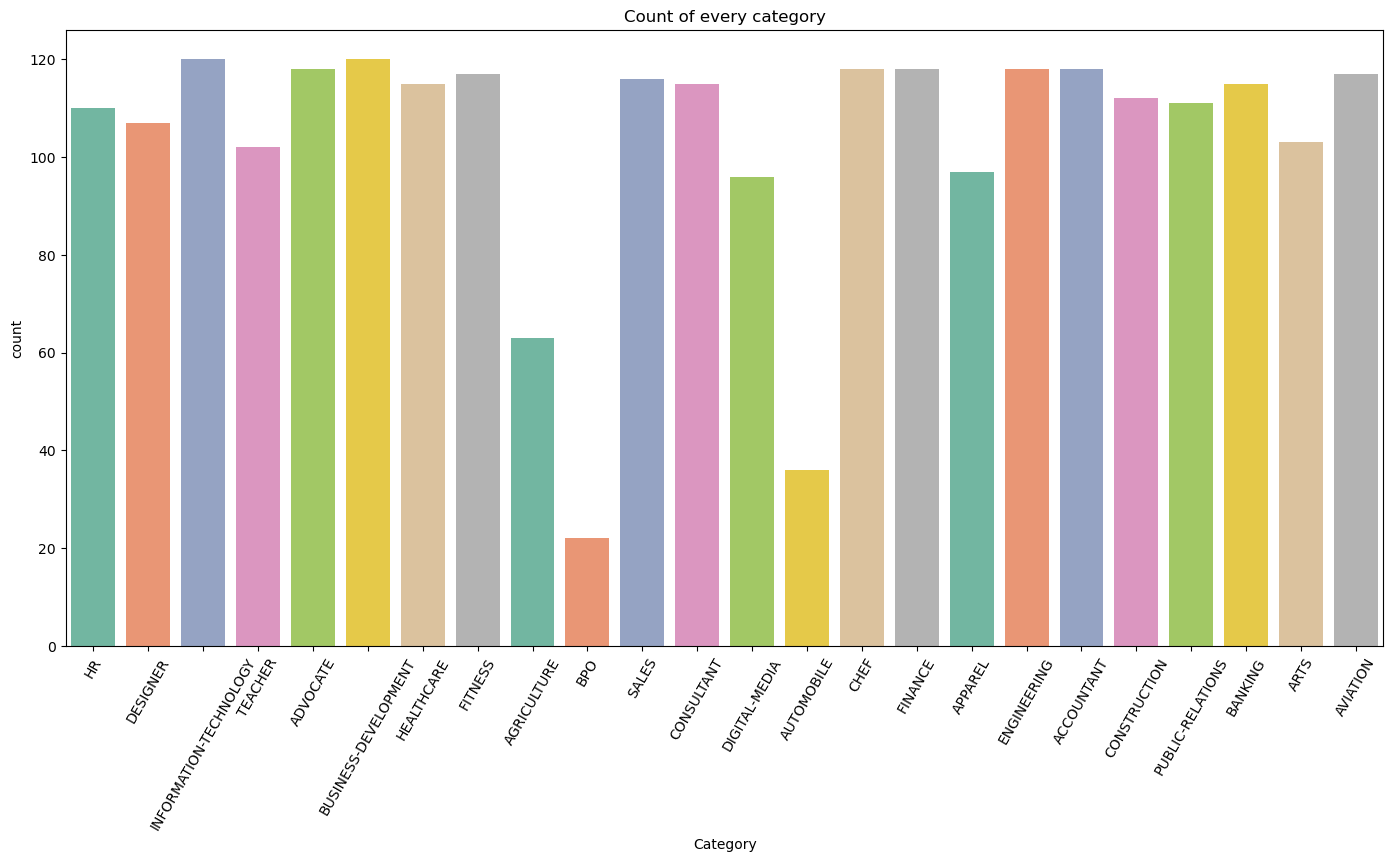

In [34]:
# Load your cleaned dataset
df = pd.read_csv(r"C:\Users\USER\Documents\Cleaned_Resume_Full.csv")

plt.figure(figsize=(17,8))
sns.countplot(df, x ="Category",palette="Set2")
plt.title("Count of every category")
plt.xticks(rotation =60)
plt.show()

Accuracy: 0.7283702213279678
                        precision    recall  f1-score   support

            ACCOUNTANT       0.92      0.96      0.94        24
              ADVOCATE       0.61      0.58      0.60        24
           AGRICULTURE       0.83      0.77      0.80        13
               APPAREL       0.75      0.32      0.44        19
                  ARTS       0.44      0.19      0.27        21
            AUTOMOBILE       0.50      0.57      0.53         7
              AVIATION       0.82      0.75      0.78        24
               BANKING       0.72      0.57      0.63        23
                   BPO       0.67      0.50      0.57         4
  BUSINESS-DEVELOPMENT       0.77      0.83      0.80        24
                  CHEF       0.87      0.83      0.85        24
          CONSTRUCTION       0.78      0.82      0.80        22
            CONSULTANT       0.83      0.83      0.83        23
              DESIGNER       0.81      0.81      0.81        21
         D

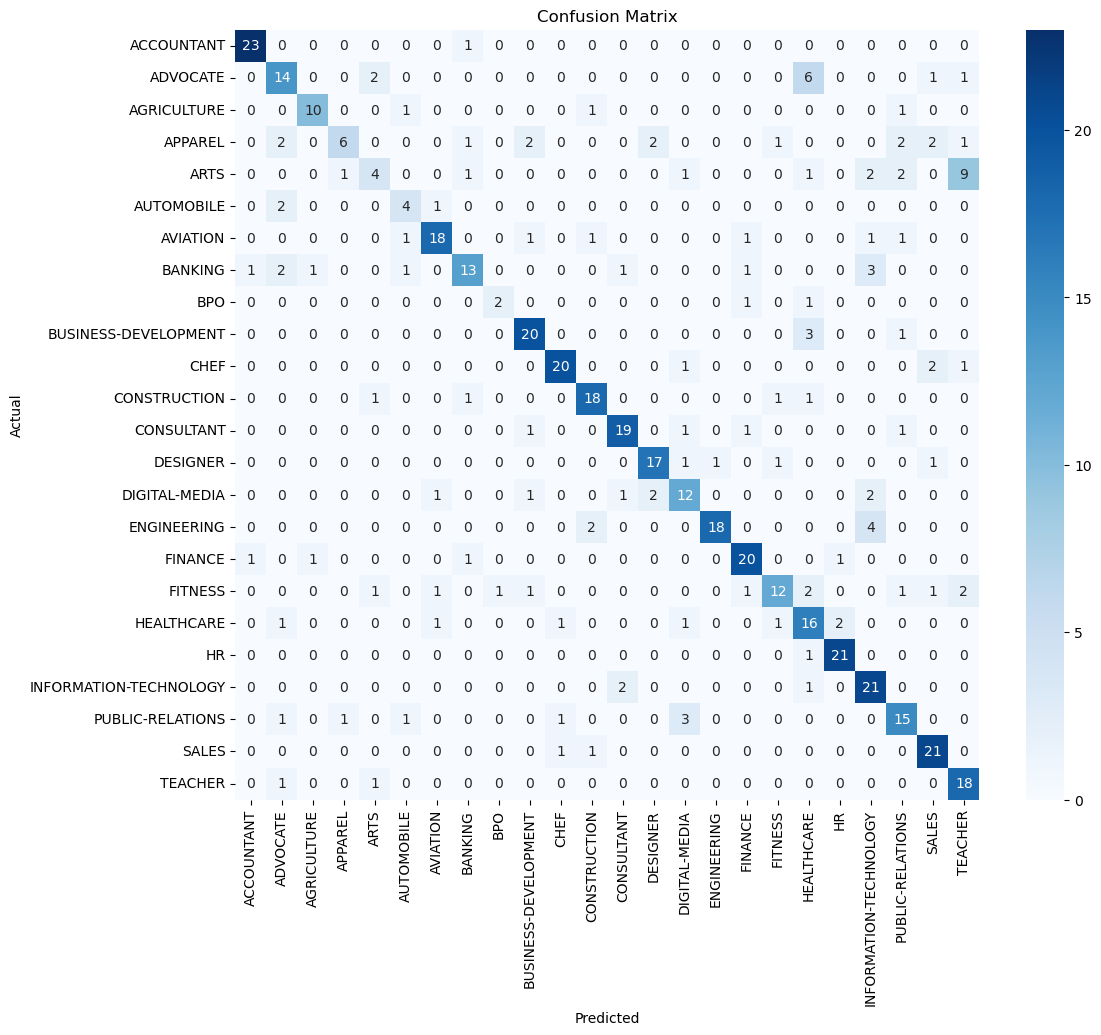

In [21]:
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

# Load augmented dataset
df = pd.read_csv(r"C:\Users\USER\Documents\Cleaned_Resume_Full.csv")

X = df["Cleaned_Resume_str"].astype(str)
y = df["Category"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Load Sentence-BERT
pretrained_model = SentenceTransformer("all-MiniLM-L6-v2")

# Encode text
X_train_embeddings = model.encode(X_train.tolist(), show_progress_bar=False)
X_test_embeddings = model.encode(X_test.tolist(), show_progress_bar=False)

# Train classifier
clf = LogisticRegression(max_iter=5000, class_weight="balanced")
clf.fit(X_train_embeddings, y_train)

# Predictions
y_pred = clf.predict(X_test_embeddings)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [10]:
import pandas as pd

# df is your main dataset with columns ['Category', 'Resume']
min_samples = 50
category_counts = df['Category'].value_counts()

# Keep only sufficient samples
valid_categories = category_counts[category_counts >= min_samples].index
df = df[df['Category'].isin(valid_categories)]

print(f"Remaining categories: {len(valid_categories)}")

Remaining categories: 22


In [25]:

merge_map = {
    'ACCOUNTANT': 'FINANCE',
    'BANKING': 'FINANCE',
    'SALES': 'BUSINESS DEVELOPMENT',
    'CONSULTANT': 'BUSINESS DEVELOPMENT',
    'PUBLIC-RELATIONS': 'MARKETING',
    'DIGITAL-MEDIA': 'MARKETING',
    'BUSINESS-DEVELOPMENT' : 'BUSINESS DEVELOPMENT',
    'FITNESS' : 'HEALTHCARE',
    'CONSTRUCTION' : 'ENGINEERING',
    'ARTS' : 'ARTS & DESIGNER',
    'DESIGNER' : 'ARTS & DESIGNER',
}

df['Category'] = df['Category'].replace(merge_map)

C:\Users\USER\AppData\Local\Temp\ipykernel_30824\568030482.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Category'] = df['Category'].replace(merge_map)


Merged dataset saved successfully as 'resume_dataset_merged.csv'


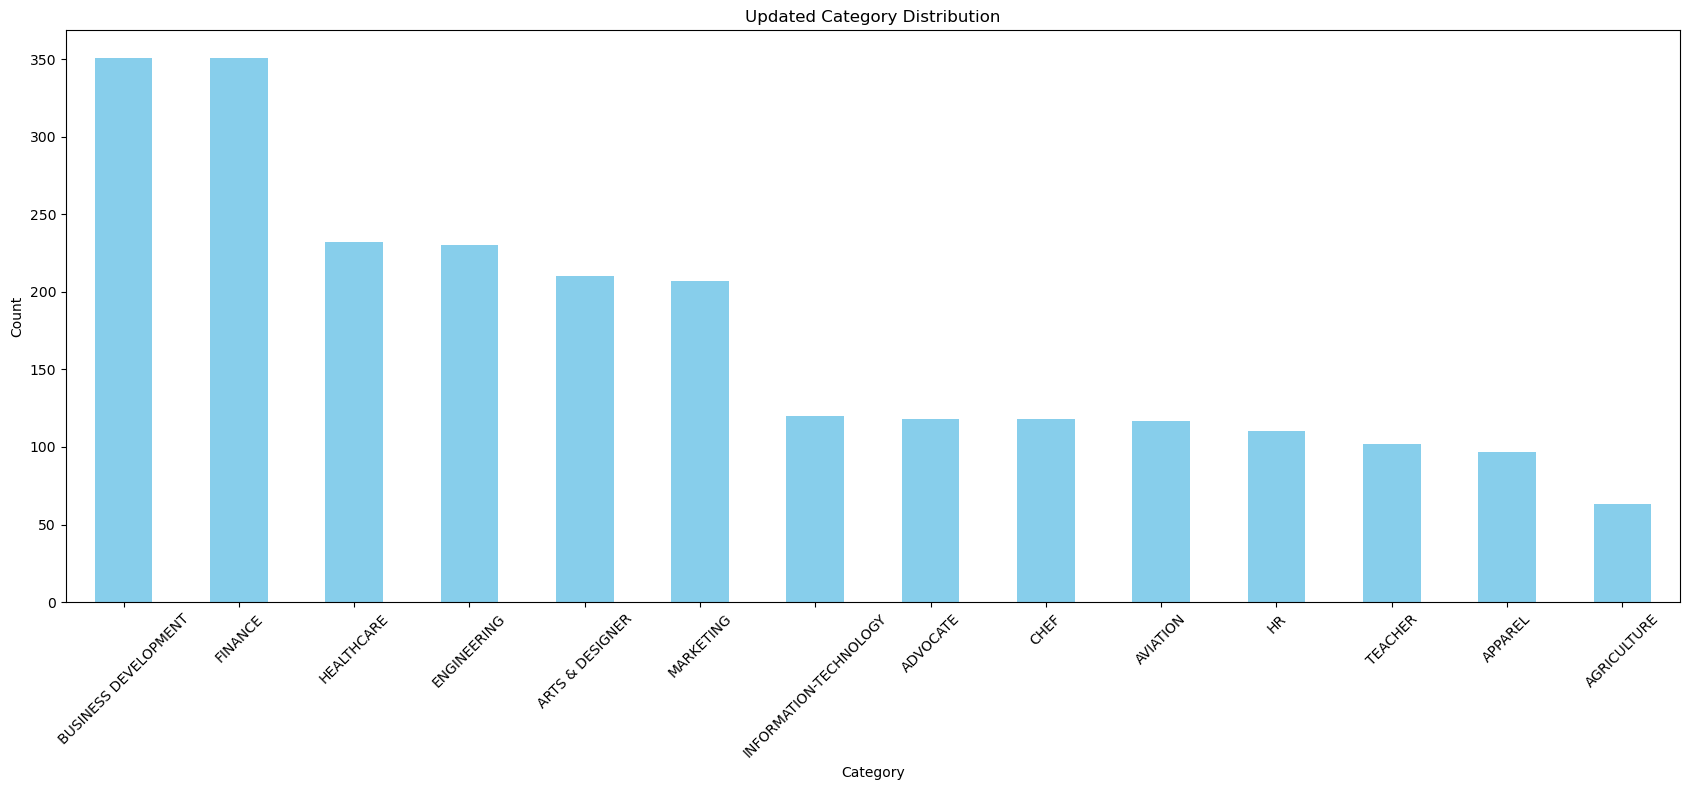

In [26]:
# Save the updated dataset
df.to_csv("resume_dataset_merged.csv", index=False)

print("Merged dataset saved successfully as 'resume_dataset_merged.csv'")

import matplotlib.pyplot as plt

plt.figure(figsize=(17,8))
df['Category'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Updated Category Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Fitting 5 folds for each of 36 candidates, totalling 180 fits


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Best Parameters: {'C': 10, 'class_weight': None, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy: 0.7325102880658436
                        precision    recall  f1-score   support

              ADVOCATE       0.69      0.38      0.49        24
           AGRICULTURE       0.50      0.46      0.48        13
               APPAREL       0.36      0.26      0.30        19
       ARTS & DESIGNER       0.67      0.52      0.59        42
              AVIATION       0.71      0.65      0.68        23
  BUSINESS DEVELOPMENT       0.78      0.77      0.78        70
                  CHEF       0.85      0.92      0.88        24
           ENGINEERING       0.85      0.87      0.86        46
               FINANCE       0.85      0.90      0.88        70
            HEALTHCARE       0.56      0.68      0.62        47
                    HR       0.85      1.00      0.92        22
INFORMATION-TECHNOLOGY       0.76      0.92      0.83        24
             MARKETING       0.63      0.64      0.64

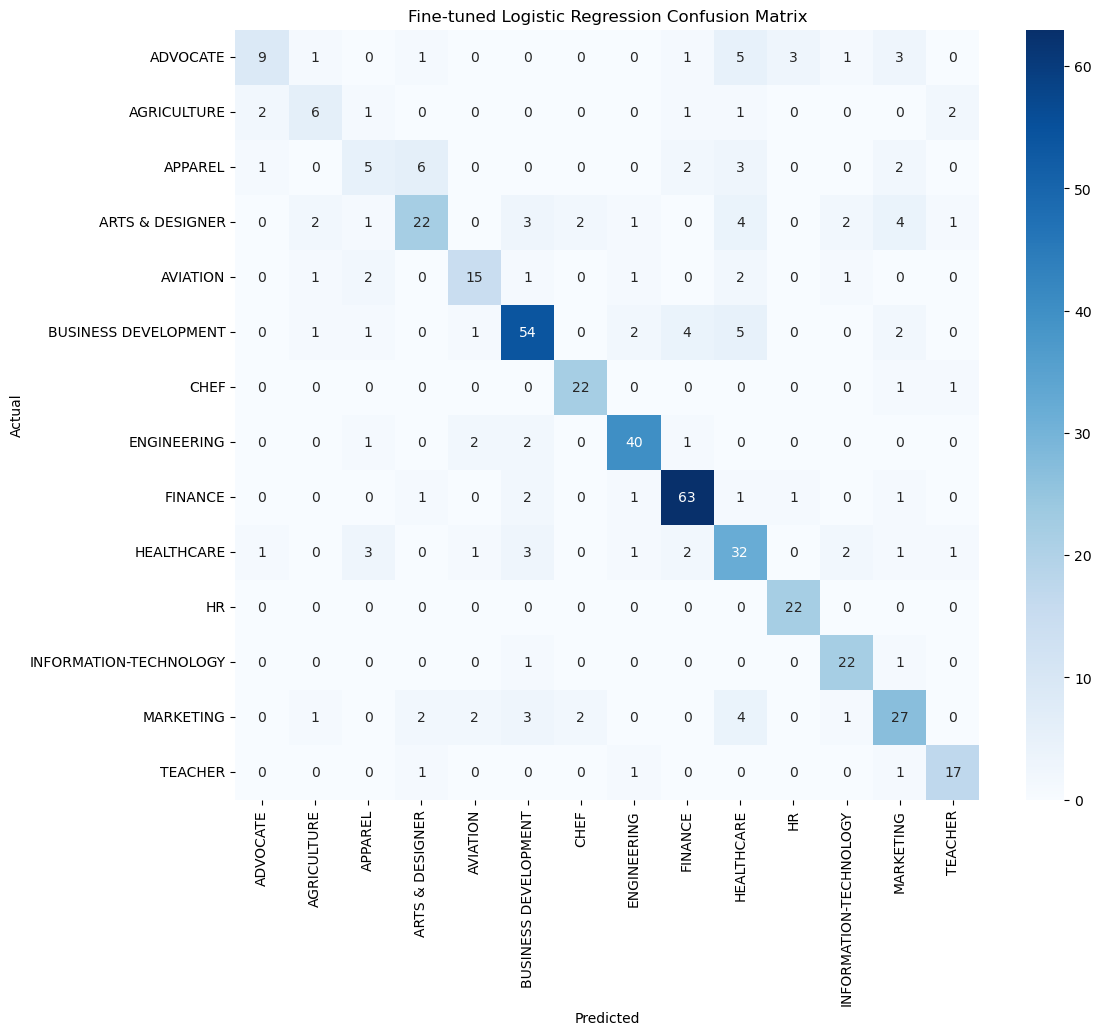

In [25]:
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load cleaned dataset
df = pd.read_csv(r"C:\Users\USER\Documents\resume_dataset_merged.csv")

X = df["Cleaned_Resume_str"].astype(str)
y = df["Category"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Load pretrained Sentence-BERT model
finetune_model = SentenceTransformer("all-MiniLM-L6-v2")

# Encode text into embeddings
X_train_embeddings = finetune_model.encode(X_train.tolist(), show_progress_bar=False)
X_test_embeddings = finetune_model.encode(X_test.tolist(), show_progress_bar=False)

# Define parameter grid for fine-tuning Logistic Regression
param_grid = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],
    "solver": ["lbfgs", "newton-cg", "saga"],
    "penalty": ["l2"],
    "class_weight": ["balanced", None]
}

# Initialize base Logistic Regression model
log_reg = LogisticRegression(max_iter=5000, multi_class="auto")

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring="accuracy"
)

# Fit model on training data
grid_search.fit(X_train_embeddings, y_train)

# Get the best model
best_clf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Evaluate the fine-tuned classifier
y_pred = best_clf.predict(X_test_embeddings)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred, labels=best_clf.classes_)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=best_clf.classes_, yticklabels=best_clf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Fine-tuned Logistic Regression Confusion Matrix")
plt.show()

In [26]:
finetune_model.save(r"C:\Users\USER\Documents\GitHub\AI-Powered Resume Analyzer and Job Matching\trained_resume_accuracy_model")